<a href="https://colab.research.google.com/github/prabindebnath25/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [122]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import time


from geopy import distance

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
path = "/content/drive/MyDrive/regression capstone project/NYC Taxi Data.csv"
df = pd.read_csv(path)

In [74]:
# df = df1.iloc[:100000]

In [75]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# EDA


In [76]:
df.shape

(1458644, 11)

In [77]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [79]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [80]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [81]:
df['weekday'] = df['pickup_datetime'].dt.weekday
df['month'] = df['pickup_datetime'].dt.month
df['hour'] = df['pickup_datetime'].dt.hour
df.drop(columns=['pickup_datetime', 'dropoff_datetime'], inplace= True)

In [82]:
df.store_and_fwd_flag.value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [83]:
df.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'weekday', 'month', 'hour'],
      dtype='object')

In [84]:
df.vendor_id.value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

## Vendor ID

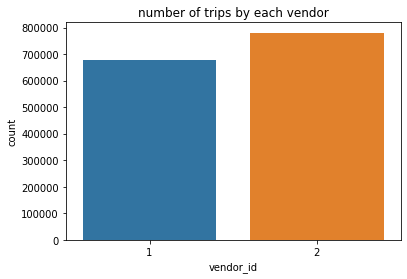

In [85]:
sns.countplot(df['vendor_id'])
plt.title("number of trips by each vendor")
plt.show()

Text(0.5, 1.0, 'trip duration by each vendor')

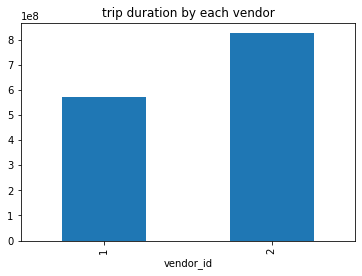

In [86]:
df.groupby(['vendor_id'])['trip_duration'].sum().plot(kind = 'bar')
plt.title('trip duration by each vendor')

* trip count of bendor 2 is more then vendor 1
* also total trip duration in vendor 2 is more thn vendor 1

## Passenger counts


In [87]:
df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

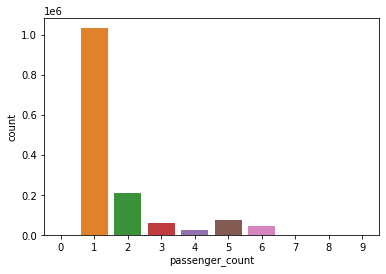

In [88]:
sns.countplot(df['passenger_count'])

* ***some values are zero which mean either the trip was cancled or there was an error in the data entry.***
* ***7, 8, 9 are extreme cases considering the capacity of a car, so we will get rid of them.***
* ***most of the trips contain atmost 1 or 2 passengers.***

In [89]:
# removing rows with unwanted passenger counts
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <=6)]

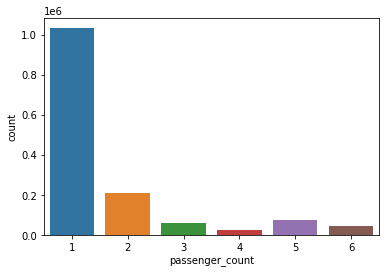

In [90]:
# after removing un wanted passenger counts
sns.countplot(df['passenger_count'])

## distance

In [91]:
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    dropoff =  (df['dropoff_latitude'], df['dropoff_longitude'])
    distance1 = distance.distance(pickup, dropoff).km
    return distance1

df['distance'] = df.apply(lambda x: calc_distance(x), axis = 1)


In [92]:
df.distance.sort_values(ascending= True)

332415        0.000000
310909        0.000000
367162        0.000000
211652        0.000000
996539        0.000000
              ...     
923793      563.028024
1100676     575.600259
910072      578.579744
974378      891.663777
184925     1240.510256
Name: distance, Length: 1458579, dtype: float64

There are distances with 0 km we get ride of them

In [93]:
df = df[df['distance'] > 0]

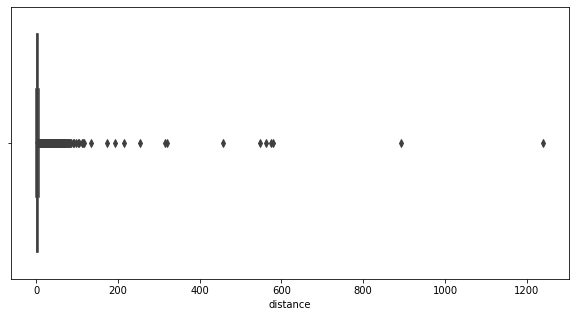

In [94]:
plt.figure(figsize= (10,5))
sns.boxplot(df['distance'])

In [95]:
df[df['distance'] > 100].shape

(19, 13)

there are only 12 rows with distance more then 100km we get rid of them

In [96]:
df=  df[df['distance'] < 100]

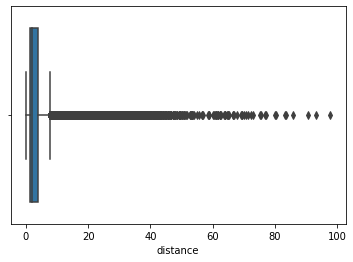

In [97]:
sns.boxplot(df['distance'])

## trip duration

In [98]:
df['trip_duration_minute'] = df['trip_duration']/60

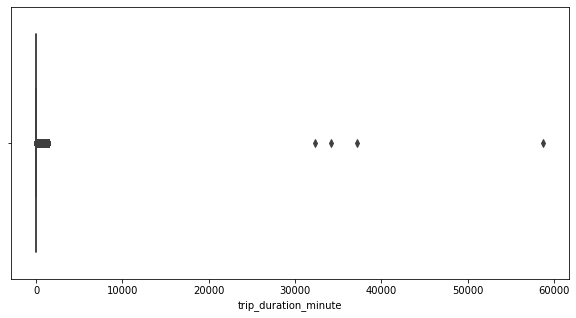

In [99]:
plt.figure(figsize= (10,5))
sns.boxplot(df['trip_duration_minute'])


we drop the rows with outliers with more then 10000 minutes and also remove the trips with zero minutes time

In [100]:
df = df[(df['trip_duration_minute'] < 1000) & (df['trip_duration_minute'] > 0) ]

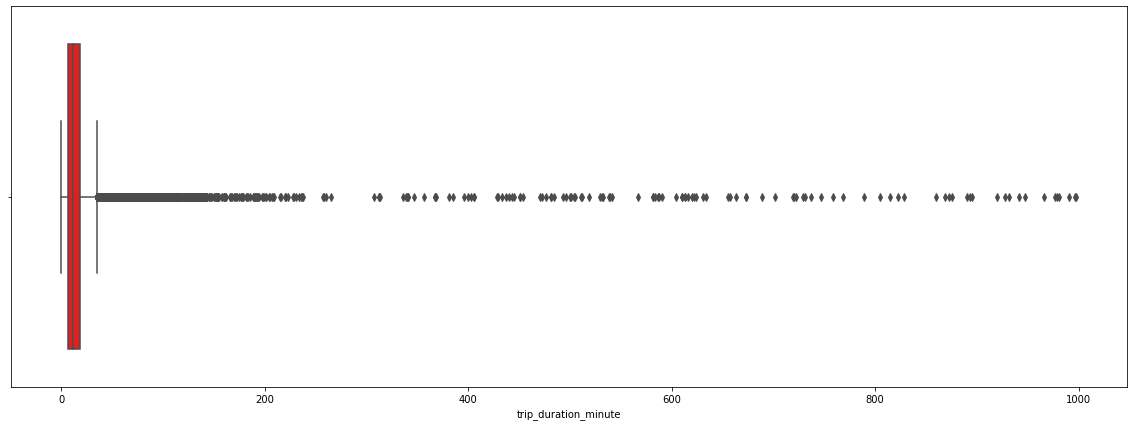

In [101]:
plt.figure(figsize= (20,7))
sns.boxplot(df['trip_duration_minute'], color = 'red')

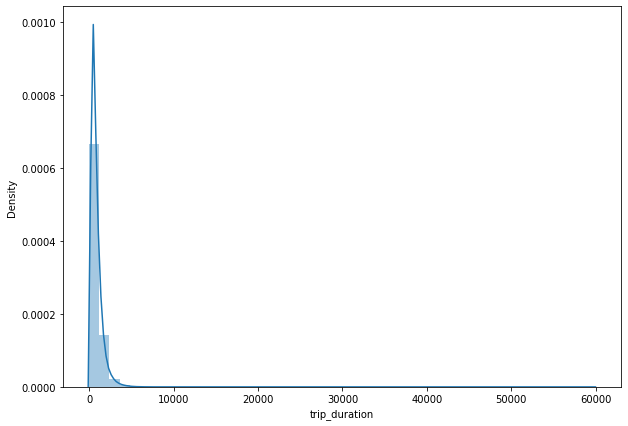

In [102]:
plt.figure(figsize= (10,7))
sns.distplot(df['trip_duration'])

In [103]:
df.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'weekday', 'month', 'hour',
       'distance', 'trip_duration_minute'],
      dtype='object')

# Data preparation

In [104]:
df.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'weekday', 'month', 'hour',
       'distance', 'trip_duration_minute'],
      dtype='object')

In [105]:
# drop some colums
df.drop(columns = ['id', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', ], inplace = True)

In [106]:
df.columns

Index(['vendor_id', 'passenger_count', 'weekday', 'month', 'hour', 'distance',
       'trip_duration_minute'],
      dtype='object')

In [107]:
# Since there are total 24 different values in these two columns it would be better to categorize them and get dummies for them.

# Function to convert pickup/dropoff hours to category.
def hour_category(x):
  if x>=(0) and x <(6):
    return 'mid_night'
  elif x>=(6) and x <(12):
    return 'morning'
  elif x>=(12) and x <(18):
    return 'afternoon'
  elif x>=(18) and x <(24):
    return 'night'

In [108]:
#  apply hour category to hour column
df['pickup_time'] = df['hour'].apply(lambda x: hour_category(x))

# drop hour colun
df.drop(columns= ['hour'], inplace= True)

In [109]:
df.columns

Index(['vendor_id', 'passenger_count', 'weekday', 'month', 'distance',
       'trip_duration_minute', 'pickup_time'],
      dtype='object')

In [110]:
# One hot encoding
df = pd.get_dummies(df, columns= ['vendor_id', 'passenger_count', 'weekday', 'month', 'pickup_time'], drop_first= True)

In [111]:
df.columns

Index(['distance', 'trip_duration_minute', 'vendor_id_2', 'passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'pickup_time_mid_night', 'pickup_time_morning',
       'pickup_time_night'],
      dtype='object')

In [112]:
df.shape

(1450716, 22)

In [113]:
dependent_variables = ['trip_duration_minute']
independent_variables = [i for i in df.columns if i not in dependent_variables]

In [114]:
# get x and y values
X = df[independent_variables]
y = np.log10(df[dependent_variables])
# Train Test Split.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state =5)

In [115]:
# Scale the data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model selection


**Models we will be building:**
* **Linear Regression**
* **Decision Tree Regressorr**
* **XG Boost Regressor**
* **Hist Gradient Boosting Regressor**


In [124]:
# Defining the models to be used.
models = [['Linear Regression', LinearRegression()],
          ["Lasso", Lasso()],
          ["Ridge", Ridge()],
          ['Elastic net',ElasticNet() ],
          ['Decision Tree Regressor', DecisionTreeRegressor()],
          ['XG Boost Regressor', xgb.XGBRegressor()],
          ['Hist Gradient Boosting Regressor', HistGradientBoostingRegressor()],
          ['GradientBoostingRegressor', GradientBoostingRegressor()],
          ['AdaBoostRegressor', AdaBoostRegressor()],
          ]

In [125]:
# creating a loop to train all the models and get eveluation metrics
model_eveluation_metrices =[]
for name, model in models:
    working_model ={}
    working_model['name'] = name
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    working_model['train_time'] = end - start
    working_model["Train_R2_Score"] = r2_score(10**(y_train),10**(model.predict(X_train)))
    working_model["Test_R2_Score"] = r2_score(10**y_test,10**(model.predict(X_test)))
    working_model["Test_RMSE_Score"] = np.sqrt(mean_squared_error(10**y_test,10**(model.predict(X_test))))
    model_eveluation_metrices.append(working_model)


model_eveluation_metrices_df = pd.DataFrame(model_eveluation_metrices)
model_eveluation_metrices_df



[08:25:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,name,train_time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Linear Regression,0.793991,-27058.714770,-1777.670978,523.561560
1,Lasso,0.245532,-0.074021,-0.071198,12.848572
2,Ridge,0.209931,-27058.158176,-1777.640141,523.557021
3,Elastic net,0.249839,-0.074021,-0.071198,12.848572
4,Decision Tree Regressor,8.390409,0.999970,0.100187,11.775952
5,XG Boost Regressor,69.409873,0.548154,0.537518,8.442430
6,Hist Gradient Boosting Regressor,15.919931,0.557539,0.546495,8.360089
7,GradientBoostingRegressor,139.852761,0.548170,0.537564,8.442006
8,AdaBoostRegressor,43.319338,0.438555,0.429522,9.376470
